# Project 2 (Group)
# Dolma Sherpa/ Chandan Gurung

# Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Import the dataset and assign to a variable

In [3]:
df=pd.read_csv("Scorecard.csv")

C:\Users\pemat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,9,31,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1688,1689,1690,1691,1692,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Data Documentation
# https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

In [5]:
df.shape

(7058, 1977)

# 1. What is the most costly college?

In [6]:
#Combining the program and annual cost for one column of tuition for all institution
df['COST'] = df['COSTT4_A']
df['COST'] = df['COST'].fillna(df['COSTT4_P'])

In [7]:
print ('The most costly college is:')
print (df.loc[df['COST'].idxmax()].INSTNM)
print ('Its cost is:')
print (df.loc[df['COST'].idxmax()].COST)

The most costly college is:
L3 Commercial Training Solutions Airline Academy
Its cost is:
105745.0


# What is the cheapest?

In [8]:
print ('The cheapest college is:')
print (df.loc[df['COST'].idxmin()].INSTNM)
print ('Its cost is:')
print (df.loc[df['COST'].idxmin()].COST)

The cheapest college is:
Purdue University Northwest
Its cost is:
0.0


# 2. What is the average cost for colleges in different parts of the US?

In [9]:
AvgCost = df.dropna(subset=['COST'])

In [10]:
AvgCost = round(AvgCost.groupby(['STABBR'])['COST'].mean())

In [11]:
print ('The average tuition for each state of US in ascending order is')
print  ('')
print (AvgCost.sort_values(ascending=True))

The average tuition for each state of US in ascending order is

STABBR
PW     6085.0
AS     7400.0
MP     8734.0
MH     8750.0
FM     9554.0
PR    11653.0
GU    12339.0
WY    14714.0
VI    16786.0
MT    17120.0
ND    17174.0
OK    17511.0
NM    18100.0
WV    18102.0
AR    18277.0
MS    19143.0
ID    19609.0
UT    20058.0
AK    20203.0
AL    20662.0
HI    20745.0
LA    20874.0
SD    21214.0
AZ    21327.0
TX    21573.0
KS    21793.0
WA    22177.0
KY    22480.0
MO    22621.0
NV    22694.0
MI    22736.0
TN    22750.0
NC    22907.0
CO    23154.0
IL    23245.0
OH    23277.0
GA    23428.0
FL    23676.0
OR    23797.0
SC    24323.0
NE    24390.0
DE    24394.0
WI    24553.0
MN    24887.0
NJ    25149.0
VA    25170.0
CA    25254.0
MD    25329.0
IA    25968.0
CT    26631.0
IN    26988.0
NY    27910.0
ME    28091.0
NH    28653.0
PA    29007.0
RI    34898.0
MA    35063.0
DC    36921.0
VT    39869.0
Name: COST, dtype: float64


# 3. What is the average cost for college for religious vs. secular institutions?

In [12]:
# creating a new data frame for religious institution and drop all rows where religious is NaN
religious = df.dropna(subset=['RELAFFIL'])

# calculate the average tuition for religious institution
print ('The average tuition for religious institution is:')
print (round(religious.COST.mean()),'$')

The average tuition for religious institution is:
37389 $


In [13]:
# create new data frame for secular institution and drop all rows where secular is NaN
secular= df.loc[pd.isnull(df).any(1),:]

# calculate the average annual tuition for secular institution
print ('The avarage annual tuition for secular institution is:')
print (round(secular.COST.mean()),'$')

The avarage annual tuition for secular institution is:
23869 $


# 4. What percent of colleges have an open admission policy?

In [14]:

# creating a data frame with only open addmission colleges

#drop rows with NaN value
OpenAdmission = df.dropna(subset=['OPENADMP'])

#drop rows with non-open admision
OpenAdmission = OpenAdmission[OpenAdmission.OPENADMP !=2]

# calculate the percentage of open admission colleges
print('There are', len(OpenAdmission), 'colleges with open admission which is', round((len(OpenAdmission))/(len(df))*100),
      '% of', len(df), 'colleges')

There are 4063 colleges with open admission which is 58 % of 7058 colleges


# 5. What is the correlation (scatterplot) between admission rates and college cost?

In [15]:
# Annual costs
Adm_Cst = df[['ADM_RATE', 'COST']].copy()

In [16]:
Adm_Cst.corr()

,ADM_RATE,COST
ADM_RATE,1.000000,-0.301969
COST,-0.301969,1.000000


In [17]:
#The correlation between Addmision rate and college cost is -0.302

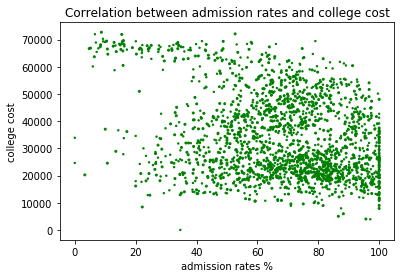

In [18]:
s=(4,2)
plt.scatter(df.ADM_RATE*100, df.COST,s,color='g')
plt.title("Correlation between admission rates and college cost")
plt.xlabel("admission rates %")
plt.ylabel("college cost")
plt.show()

# 6. What is the correlation between SAT scores and admission rates? Are there any outliers?

In [19]:
Adm_Sat = df[['ADM_RATE', 'SAT_AVG']].copy()

In [20]:
Adm_Sat.corr()

,ADM_RATE,SAT_AVG
ADM_RATE,1.000000,-0.413266
SAT_AVG,-0.413266,1.000000


In [21]:
# The correlation between Admission rate and SAT scores is -0.41

# Outliers

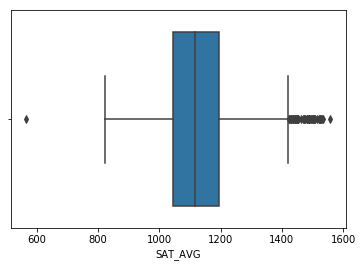

In [22]:
sns.boxplot(df.SAT_AVG)

In [23]:
# There is one an outlier just below 600 
df.SAT_AVG.sort_values(ascending=True).head(2)

825     564.0
2513    822.0
Name: SAT_AVG, dtype: float64

In [24]:
# There is an outlier with SAT average of 564

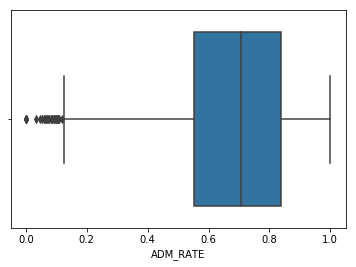

In [25]:
sns.boxplot(df.ADM_RATE)

In [26]:
#There are outliers close to 0.0
df.ADM_RATE.sort_values(ascending=True).head(5)

6065    0.000
5188    0.000
2960    0.000
6610    0.000
2964    0.033
Name: ADM_RATE, dtype: float64

In [27]:
#There are 4 outliers with 0 admission rate

# Extra Credit 

# 7. What colleges have the highest and lowest family income averages? How does that correlate with college costs?

In [28]:
df['FAMINC'] = df['FAMINC'].replace('PrivacySuppressed', np.nan)
df['FAMINC'] = df.FAMINC.astype(float)

In [29]:
print('The highest family income is :  ', round(df['FAMINC'].max()),'$')
print('Institution:',df.iloc[df['FAMINC'].idxmax].INSTNM,',', df.iloc[df['FAMINC'].idxmax].STABBR)

The highest family income is :   174263.0 $
Institution: Jewish Theological Seminary of America , NY


In [30]:
print('The lowest family income is:  ', round(df['FAMINC'].min()),'$')
print('Institution:',df.iloc[df['FAMINC'].idxmin].INSTNM,',', df.iloc[df['FAMINC'].idxmin].STABBR)

The lowest family income is:   321.0 $
Institution: J F Ingram State Technical College , AL


# Correlation 

In [31]:
Fam_Cost = df[['FAMINC', 'COST']].copy()

In [32]:
Fam_Cost.corr()

,FAMINC,COST
FAMINC,1.0000,0.6758
COST,0.6758,1.0000


In [33]:
#The correlation between a family income and tuition cost is 0.67